<a href="https://colab.research.google.com/github/Adithibpnad/Data-Analysis-on-Internship-Opportunities-with-Rprogramming-/blob/main/internshipopportunitypython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Button(description='Top 10 Stipend', style=ButtonStyle())

Head of the data:
            internship_title                             company_name  \
0           Java Development                              SunbaseData   
1           Java Development                              SunbaseData   
2     Accounting and Finance                          DAKSM & Co. LLP   
3  Sales & Digital Marketing  Bharat Natural Elements Private Limited   
4    Social Entrepreneurship                       Hamari Pahchan NGO   

         location   start_date  duration stipend  
0  Work From Home  Immediately  6 Months  35,000  
1  Work From Home  Immediately  6 Months  35,000  
2           Noida  Immediately  6 Months  10,000  
3       Bangalore  Immediately  6 Months   5,000  
4  Work From Home  Immediately  6 Months     NaN  
Tail of the data:
               internship_title                           company_name  \
1019       Human Resources (HR)         IIDE Education Private Limited   
1020                  Marketing                     Studio Image Works 

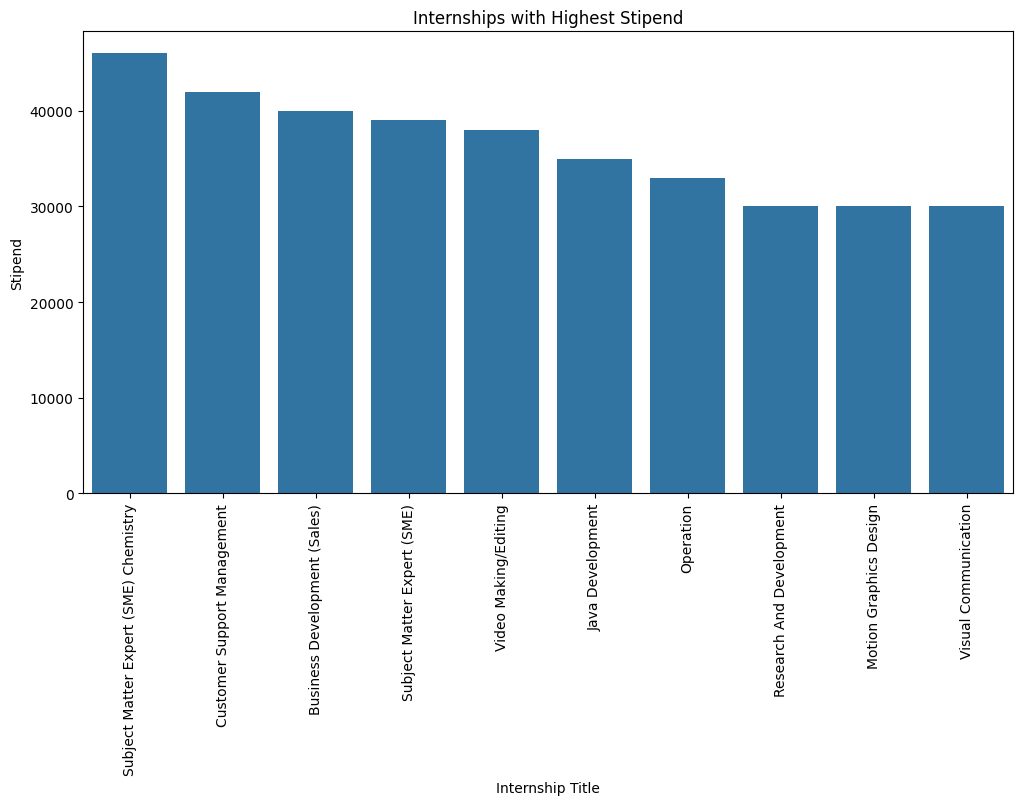

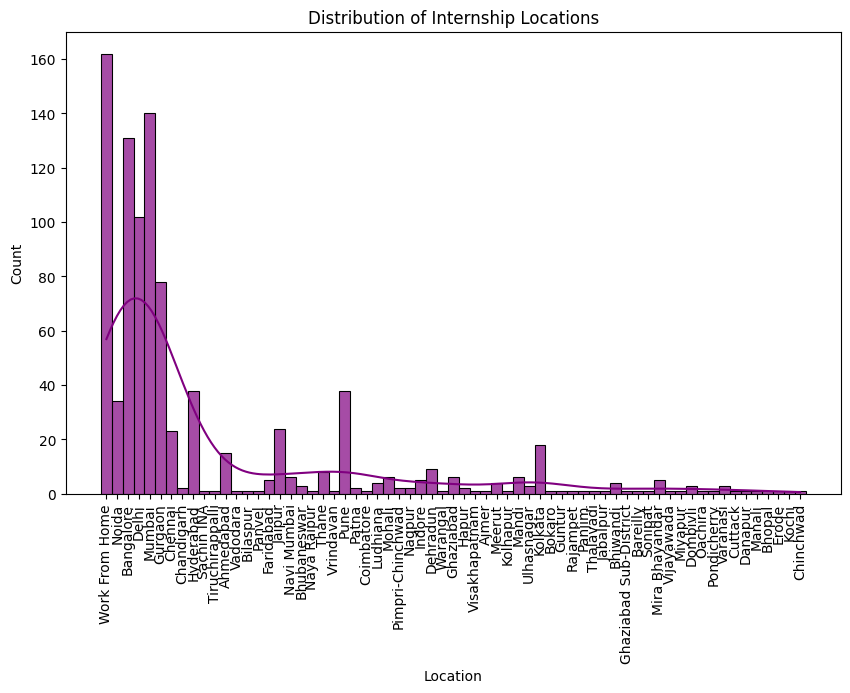

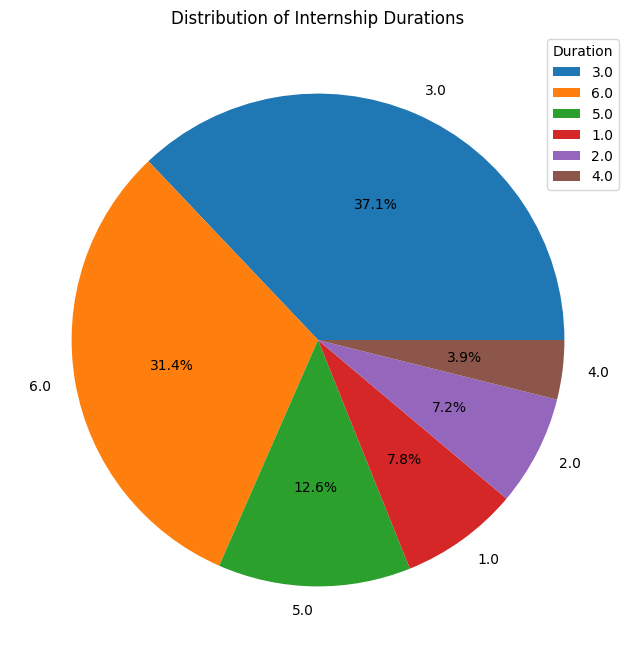

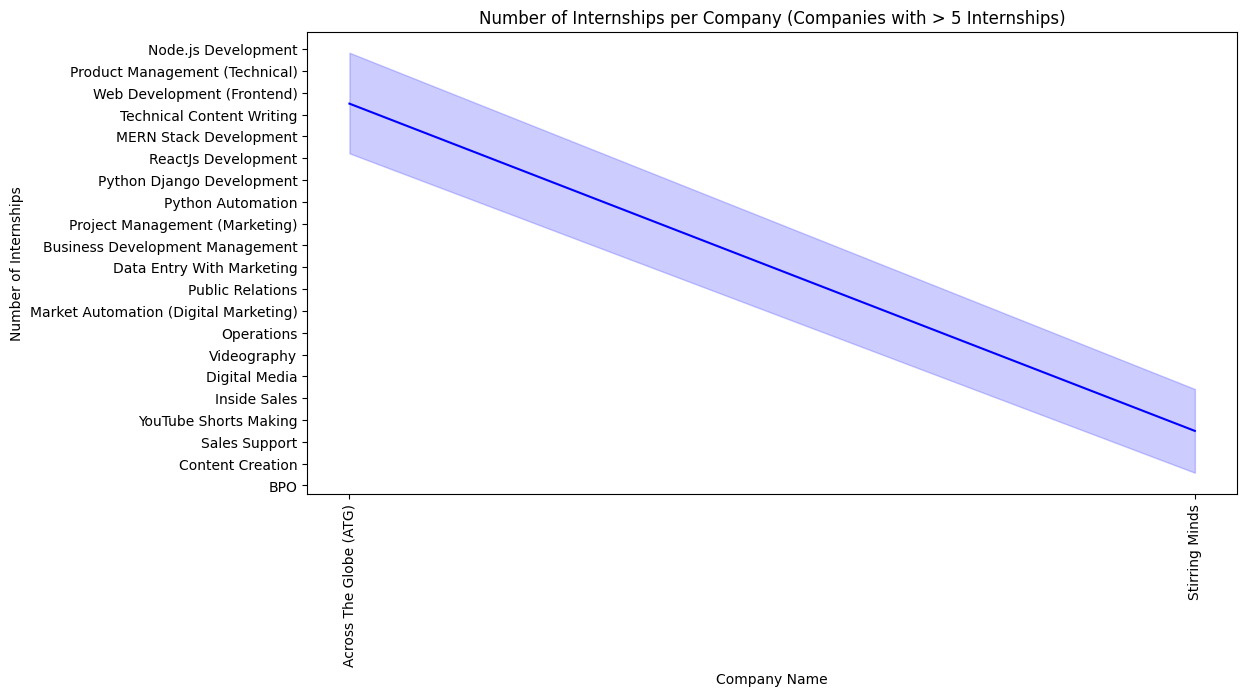

R-squared: -0.022276784516935377
Mean Squared Error: 38545166.446296826
Mean Absolute Error: 4829.349636185403


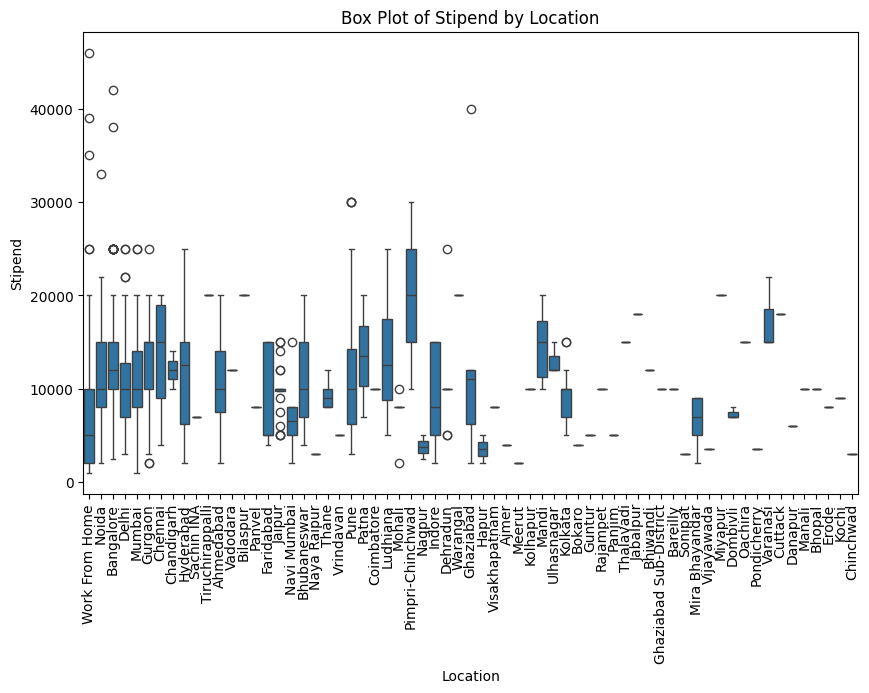

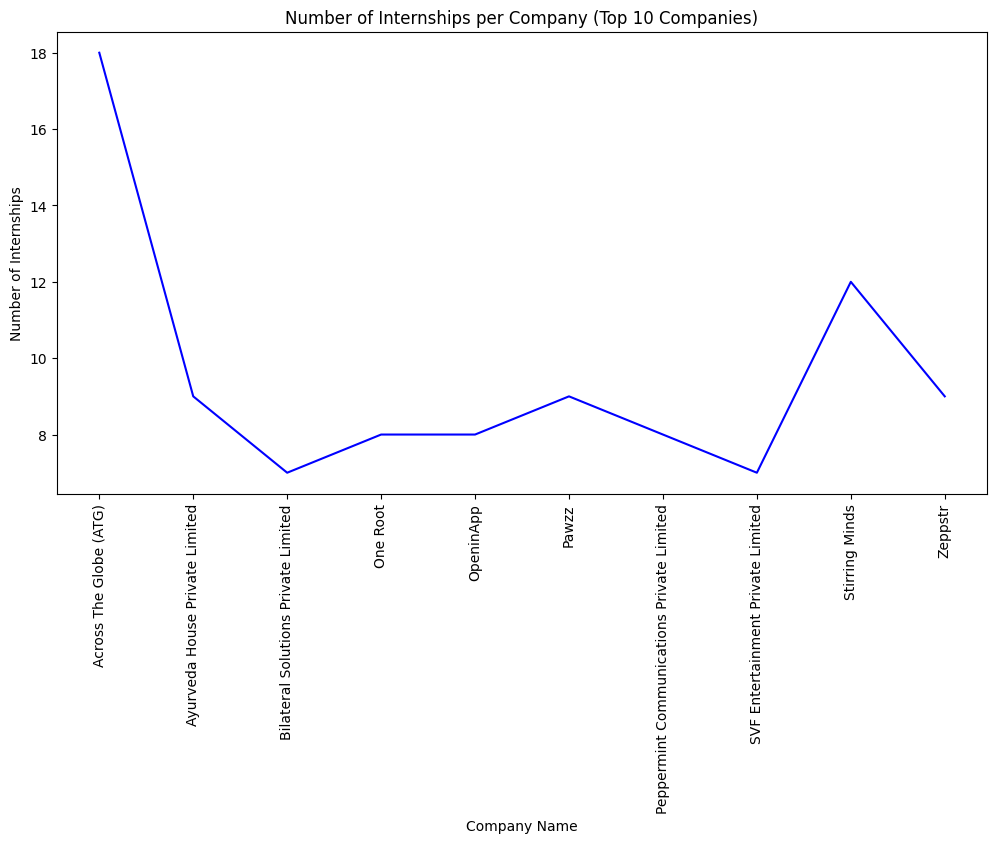

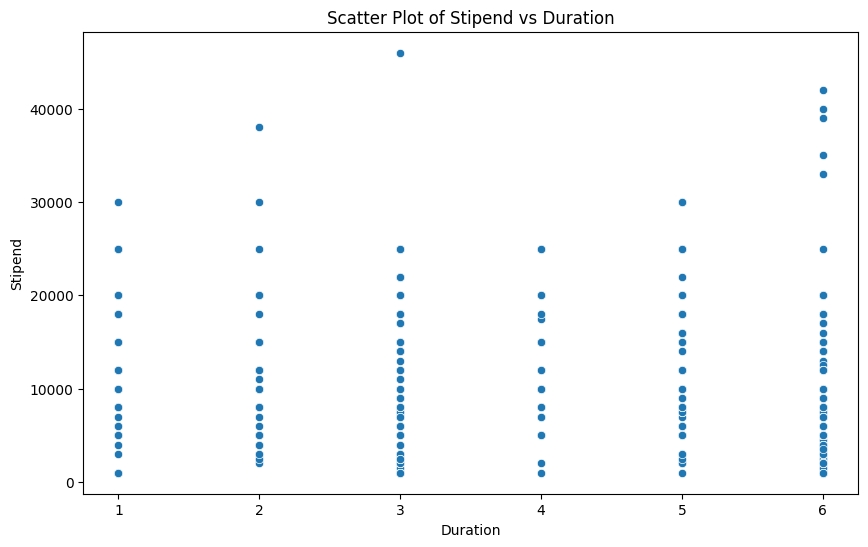

In [ ]:
# Install necessary libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install ipywidgets


# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tkinter as tk
from tkinter import ttk
import ipywidgets as widgets
from IPython.display import display, Javascript
from scipy.stats import zscore





# Detect the encoding of the CSV file
import chardet
with open('/content/internship.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

# Load the data
internship_data = pd.read_csv('/content/internship.csv', encoding=encoding)


def display_top10_stipend():
    top10 = internship_data.sort_values('stipend', ascending=False).head(10)

    # Create a user interface object
    ui = widgets.VBox([
        widgets.Label(f"Top 10 Stipends:"),
        widgets.Table(value=top10[['internship_title', 'stipend']],
                      row_headers=None,
                      header_filters=False,
                      layout=widgets.TableLayout(width='100%', height='300px'))
    ])

    # Display the user interface
    display(ui)

# Create the button and add the function as a callback
button = widgets.Button(description="Top 10 Stipend")
button.on_click(display_top10_stipend)

# Display the button
display(button)

# Explore the data
print('Head of the data:')
print(internship_data.head())

print('Tail of the data:')
print(internship_data.tail())

print('Data information:')
print(internship_data.info())

print('Summary of the data:')
print(internship_data.describe())

# Data preprocessing
# Drop duplicate rows
internship_data = internship_data.drop_duplicates()
print('Total number of rows after deleting duplicates:', internship_data.shape[0])

# Handle missing values
internship_data.dropna(subset=['stipend', 'duration'], inplace=True)

# Convert 'stipend' column to numeric
internship_data['stipend'] = internship_data['stipend'].str.replace(',', '').astype(float)

# Convert 'duration' column to numeric
internship_data['duration'] = internship_data['duration'].str.extract('(\d+)', expand=False).astype(float)

# Data analysis
mean_stipend = internship_data['stipend'].mean()
median_stipend = internship_data['stipend'].median()
print('Mean stipend:', mean_stipend)
print('Median stipend:', median_stipend)

# Data visualization
# Bar plot of top 10 internships by stipend
top10 = internship_data.sort_values('stipend', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='internship_title', y='stipend', data=top10)
plt.xticks(rotation=90)
plt.title('Internships with Highest Stipend')
plt.xlabel('Internship Title')
plt.ylabel('Stipend')
plt.show()

# Histogram of internship locations
plt.figure(figsize=(10, 6))
sns.histplot(data=internship_data, x='location', kde=True, color='purple', alpha=0.7)
plt.title('Distribution of Internship Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Pie chart of internship durations
duration_counts = internship_data['duration'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Internship Durations')
plt.legend(title='Duration')
plt.show()

# Line plot of number of internships per company (companies with > 10 internships)
selected_companies = internship_data['company_name'].value_counts()[internship_data['company_name'].value_counts() > 10].index
selected_data = internship_data[internship_data['company_name'].isin(selected_companies)]
plt.figure(figsize=(12, 6))
sns.lineplot(x='company_name', y='internship_title', data=selected_data, color='blue')
plt.title('Number of Internships per Company (Companies with > 5 Internships)')
plt.xlabel('Company Name')
plt.ylabel('Number of Internships')
plt.xticks(rotation=90)
plt.show()

# Linear regression
# Assuming you have 'stipend' as the dependent variable and 'duration' as the independent variable
X = internship_data['duration'].values.reshape(-1, 1)
y = internship_data['stipend'].dropna().values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:', r2)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

# Create box plot of stipend by location
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='stipend', data=internship_data)
plt.title('Box Plot of Stipend by Location')
plt.xlabel('Location')
plt.ylabel('Stipend')
plt.xticks(rotation=90)
plt.show()

# Get top 10 companies by number of internships
top_companies = internship_data['company_name'].value_counts().head(10)

# Filter data for top 10 companies
filtered_data = internship_data[internship_data['company_name'].isin(top_companies.index)]

# Group data by company name and count number of internships
grouped_data = filtered_data.groupby('company_name').size().reset_index(name='counts')

# Create multiline plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='company_name', y='counts', data=grouped_data, color='blue')
plt.title('Number of Internships per Company (Top 10 Companies)')
plt.xlabel('Company Name')
plt.ylabel('Number of Internships')
plt.xticks(rotation=90)
plt.show()


# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='stipend', data=internship_data)
plt.title('Scatter Plot of Stipend vs Duration')
plt.xlabel('Duration')
plt.ylabel('Stipend')
plt.show()

# Calculate Z-scores for 'stipend' and 'duration' columns
z_scores = np.abs(zscore(internship_data[['stipend', 'duration']]))

# Remove rows with Z-scores greater than 3
internship_data = internship_data[(z_scores < 3)].reset_index(drop=True)


